In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
os.chdir('/content/drive/MyDrive/python/zs news/')
os.getcwd()

'/content/drive/MyDrive/python/zs news'

# Read Data

In [6]:
train = pd.read_csv('/content/drive/MyDrive/python/zs news/train_file.csv')
test = pd.read_csv('/content/drive/MyDrive/python/zs news/test_file.csv')
print(train.shape, test.shape)

(55932, 11) (37288, 9)


In [7]:
train.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [8]:
test.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


# Prepare training data

In [9]:
train.duplicated().sum()

0

In [10]:
train.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'Facebook', 'GooglePlus', 'LinkedIn', 'SentimentTitle',
       'SentimentHeadline'],
      dtype='object')

In [11]:
df1 = train[['Title','SentimentTitle']].copy()
df1.columns = ['text','sentiment']
df1.shape

(55932, 2)

In [12]:
df2 = train[['Headline','SentimentHeadline']].copy()
df2.columns = ['text','sentiment']
df2.shape

(55932, 2)

In [13]:
df = pd.concat([df1,df2], axis=0, ignore_index=True)
df.shape

(111864, 2)

In [14]:
df.head()

,text,sentiment
0,Obama Lays Wreath at Arlington National Cemetery,0.000000
1,A Look at the Health of the Chinese Economy,0.208333
2,Nouriel Roubini: Global Economy Not Back to 2008,-0.425210
3,Finland GDP Expands In Q4,0.000000
4,"Tourism, govt spending buoys Thai economy in J...",0.000000


# Cleaning df

In [15]:
print(df.shape)
df = df.drop_duplicates().reset_index(drop=True).copy()
df = df.dropna(how='any')
print(df.shape)

(111864, 2)
(101075, 2)


In [16]:
df.head()

,text,sentiment
0,Obama Lays Wreath at Arlington National Cemetery,0.000000
1,A Look at the Health of the Chinese Economy,0.208333
2,Nouriel Roubini: Global Economy Not Back to 2008,-0.425210
3,Finland GDP Expands In Q4,0.000000
4,"Tourism, govt spending buoys Thai economy in J...",0.000000


# Creating X and y

In [17]:
X=df['text'].values.reshape(-1,1)
y=df['sentiment'].values.reshape(-1,1)
print(X.shape,y.shape)

(101075, 1) (101075, 1)


In [18]:
X[:10]

array([['Obama Lays Wreath at Arlington National Cemetery'],
       ['A Look at the Health of the Chinese Economy'],
       ['Nouriel Roubini: Global Economy Not Back to 2008'],
       ['Finland GDP Expands In Q4'],
       ['Tourism, govt spending buoys Thai economy in January'],
       ['Intellitec Solutions to Host 13th Annual Spring Microsoft Dynamics User Group'],
       ['Monday, 29 Feb 2016'],
       ['Obama, stars pay a musical tribute to Ray Charles'],
       ['Fire claims more than 100-year-old barn in Hancock County'],
       ["Microsoft's new Windows 10 ad targets Apple"]], dtype=object)

In [19]:
y[:10]

array([[ 0.        ],
       [ 0.20833333],
       [-0.42521003],
       [ 0.        ],
       [ 0.        ],
       [-0.07537784],
       [ 0.        ],
       [ 0.08333333],
       [-0.17392527],
       [-0.05953621]])

# Text Cleaning

In [20]:
import re
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm

In [21]:
"not" in STOP_WORDS

True

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
punct = "!#$%&()*+,-./:;<=>?@[\]^_`{|}~"
print(punct)

!#$%&()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
doc = nlp("Id cant do this and it's difficult. My website n't www.google.com")
for token in doc:
  print(token.lemma_)

-PRON-
would
can
not
do
this
and
-PRON-
be
difficult
.
-PRON-
website
n't
www.google.com


In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [27]:
# def text_cleaning(X):
#   corpus = []
#   for i in tqdm(range(0,len(X))):
#     sen = re.sub("http?\S+"," ",X[i][0])
#     sen = re.sub('[^a-zA-Z]', ' ', sen)
#     doc = nlp(sen)
#     tokens = []
#     for token in doc:
#       if token.lemma_ != "-PRON-":
#         temp = token.lemma_.lower().strip()
#       else:
#         temp = token.lower_.strip()
#       tokens.append(temp)
#       tokens = [token for token in tokens if token not in punct]
#     corpus.append(' '.join(tokens))
#   return corpus

In [28]:
# corpus = text_cleaning(X)
# print('cleaning done..')

# loading cleaned data as corpus

In [29]:
cleaned_data_df = pd.read_csv('/content/drive/MyDrive/python/zs news/cleaned_data.csv')
print(cleaned_data_df.shape)
cleaned_data_df.head()

(101075, 2)


,corpus,sentiment
0,obama lays wreath at arlington national cemetery,0.000000
1,a look at the health of the chinese economy,0.208333
2,nouriel roubini global economy not back to,-0.425210
3,finland gdp expand in q,0.000000
4,tourism govt spending buoy thai economy in jan...,0.000000


In [30]:
corpus = cleaned_data_df['corpus'].dropna().tolist()
y = cleaned_data_df.dropna()['sentiment'].values.reshape(-1,1)
print(corpus[:10])

['obama lays wreath at arlington national cemetery', 'a look at the health of the chinese economy', 'nouriel roubini global economy not back to', 'finland gdp expand in q', 'tourism govt spending buoy thai economy in january', 'intellitec solutions to host th annual spring microsoft dynamics user group', 'monday feb', 'obama star pay a musical tribute to ray charles', 'fire claim more than year old barn in hancock county', 'microsoft s new windows ad target apple']


In [31]:
print(len(corpus), y.shape)

101074 (101074, 1)


In [32]:
len(corpus)

101074

In [33]:
test.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'Facebook', 'GooglePlus', 'LinkedIn'],
      dtype='object')

# Find max len

In [34]:
max([len(i[0].split()) for i in X])

80

In [35]:
max([len(i.split()) for i in corpus])

87

In [36]:
a=set()
for i in corpus:
  for j in i.split():
    a.add(j)
len(a)

35442

# Onehot

In [37]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
voc_size = 25000

In [38]:
corpus_tot = corpus
len(corpus_tot)

101074

In [39]:
onehot_rep = [one_hot(words, n=voc_size) for words in corpus_tot]

In [40]:
onehot_rep[:5]

[[1648, 448, 13595, 18574, 9483, 3378, 8844],
 [515, 23855, 18574, 10485, 7276, 13402, 10485, 21263, 24731],
 [21288, 10410, 3927, 24731, 10995, 9247, 1470],
 [24810, 3793, 1791, 23782, 20401],
 [22403, 16777, 24306, 16567, 18141, 24731, 23782, 11286]]

In [41]:
len(onehot_rep)

101074

In [42]:
sent_length = 90
embedded_docs = pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
print(embedded_docs[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0  1648
   448 13595 18574  9483  3378  8844]


In [43]:
embedded_docs_train = embedded_docs[:len(corpus)]
# embedded_docs_test_title = embedded_docs[len(corpus):len(corpus)+len(corpus_test_title)]
# embedded_docs_test_head = embedded_docs[len(corpus)+len(corpus_test_title):]

# print(len(corpus),len(corpus_test_title),len(corpus_test_head))
# print(len(embedded_docs_train),len(embedded_docs_test_title),len(embedded_docs_test_head))

# Split data

In [44]:
# embedded_docs_train.shape, y.shape, embedded_docs_test_title.shape, embedded_docs_test_head.shape

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(embedded_docs_train, y, test_size=0.33, random_state = 42, shuffle=True)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((67719, 90), (67719, 1), (33355, 90), (33355, 1))

# Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
embedding_dim=128

In [48]:
early_s = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# model 1

In [49]:
model_lstm_1=Sequential()
model_lstm_1.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_lstm_1.add(LSTM(128))
model_lstm_1.add(Dropout(0.25))
model_lstm_1.add(Flatten())
model_lstm_1.add(Dense(1, activation='tanh'))
model_lstm_1.compile(loss='mean_squared_error',optimizer='adam')
# print(model_lstm_1.summary())

history1 = model_lstm_1.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=1024, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
67/67 [==============================] - 13s 101ms/step - loss: 0.0130 - val_loss: 0.0092
Epoch 2/20
67/67 [==============================] - 6s 90ms/step - loss: 0.0082 - val_loss: 0.0094
Epoch 3/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0072 - val_loss: 0.0086
Epoch 4/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0067 - val_loss: 0.0089
Epoch 5/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0062 - val_loss: 0.0088
Epoch 6/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0057 - val_loss: 0.0087
Epoch 7/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0052 - val_loss: 0.0089
Epoch 8/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0047 - val_loss: 0.0087
Epoch 9/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0043 - val_loss: 0.0088
Epoch 10/20
67/67 [==============================] - 6s 93ms/step - loss: 0.0040 - val_loss: 0.0090
Epoch 1

#model 2

In [50]:
model_lstm_2=Sequential()
model_lstm_2.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_lstm_2.add(LSTM(64))
model_lstm_2.add(Dropout(0.25))
model_lstm_2.add(Flatten())
model_lstm_2.add(Dense(1, activation='tanh'))
model_lstm_2.compile(loss='mean_squared_error',optimizer='adam')
# print(model_lstm_2.summary())

history2 = model_lstm_2.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=512, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
133/133 [==============================] - 7s 40ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 2/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 3/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0071 - val_loss: 0.0085
Epoch 4/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0062 - val_loss: 0.0084
Epoch 5/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0054 - val_loss: 0.0083
Epoch 6/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0048 - val_loss: 0.0082
Epoch 7/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0043 - val_loss: 0.0083
Epoch 8/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0039 - val_loss: 0.0085
Epoch 9/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0035 - val_loss: 0.0085
Epoch 10/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0033 - val_lo

#model 3

In [51]:
model_lstm_3=Sequential()
model_lstm_3.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_lstm_3.add(LSTM(128))
model_lstm_3.add(Dropout(0.5))
model_lstm_3.add(Flatten())
model_lstm_3.add(Dense(1, activation='tanh'))
model_lstm_3.compile(loss='mean_squared_error',optimizer='adam')
# print(model_lstm_3.summary())

history3 = model_lstm_3.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=1024, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
67/67 [==============================] - 9s 99ms/step - loss: 0.0134 - val_loss: 0.0092
Epoch 2/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 3/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0075 - val_loss: 0.0087
Epoch 4/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0069 - val_loss: 0.0087
Epoch 5/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0065 - val_loss: 0.0089
Epoch 6/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0061 - val_loss: 0.0089
Epoch 7/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0057 - val_loss: 0.0090
Epoch 8/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0052 - val_loss: 0.0088
Epoch 9/20
67/67 [==============================] - 6s 92ms/step - loss: 0.0049 - val_loss: 0.0090
Epoch 10/20
67/67 [==============================] - 6s 91ms/step - loss: 0.0045 - val_loss: 0.0093
Epoch 11/

#model 4

In [52]:
model_lstm_4=Sequential()
model_lstm_4.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_lstm_4.add(LSTM(64))
model_lstm_4.add(Dropout(0.5))
model_lstm_4.add(Flatten())
model_lstm_4.add(Dense(1, activation='tanh'))
model_lstm_4.compile(loss='mean_squared_error',optimizer='adam')
# print(model_lstm_4.summary())

history4 = model_lstm_4.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=512, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
133/133 [==============================] - 7s 40ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 2/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0083 - val_loss: 0.0087
Epoch 3/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0075 - val_loss: 0.0086
Epoch 4/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0068 - val_loss: 0.0085
Epoch 5/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0062 - val_loss: 0.0085
Epoch 6/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0055 - val_loss: 0.0084
Epoch 7/20
133/133 [==============================] - 5s 37ms/step - loss: 0.0050 - val_loss: 0.0083
Epoch 8/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0046 - val_loss: 0.0086
Epoch 9/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0043 - val_loss: 0.0085
Epoch 10/20
133/133 [==============================] - 5s 36ms/step - loss: 0.0040 - val_lo

# model 5

In [53]:
model_bilstm_1=Sequential()
model_bilstm_1.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_bilstm_1.add(Bidirectional(LSTM(128)))
model_bilstm_1.add(Dropout(0.25))
model_bilstm_1.add(Flatten())
model_bilstm_1.add(Dense(1, activation='tanh'))
model_bilstm_1.compile(loss='mean_squared_error',optimizer='adam')
# print(model_bilstm_1.summary())

history5 = model_bilstm_1.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=1024, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
67/67 [==============================] - 16s 190ms/step - loss: 0.0140 - val_loss: 0.0104
Epoch 2/20
67/67 [==============================] - 12s 178ms/step - loss: 0.0084 - val_loss: 0.0090
Epoch 3/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0074 - val_loss: 0.0086
Epoch 4/20
67/67 [==============================] - 12s 175ms/step - loss: 0.0068 - val_loss: 0.0088
Epoch 5/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0064 - val_loss: 0.0088
Epoch 6/20
67/67 [==============================] - 12s 177ms/step - loss: 0.0059 - val_loss: 0.0086
Epoch 7/20
67/67 [==============================] - 12s 177ms/step - loss: 0.0054 - val_loss: 0.0086
Epoch 8/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0049 - val_loss: 0.0087
Epoch 9/20
67/67 [==============================] - 12s 175ms/step - loss: 0.0044 - val_loss: 0.0086
Epoch 10/20
67/67 [==============================] - 12s 175ms/step - loss: 0.0041 - val_lo

# model 6

In [54]:
model_bilstm_2=Sequential()
model_bilstm_2.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_bilstm_2.add(Bidirectional(LSTM(64)))
model_bilstm_2.add(Dropout(0.25))
model_bilstm_2.add(Flatten())
model_bilstm_2.add(Dense(1, activation='tanh'))
model_bilstm_2.compile(loss='mean_squared_error',optimizer='adam')
# print(model_bilstm_2.summary())

history6 = model_bilstm_2.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=512, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
133/133 [==============================] - 13s 75ms/step - loss: 0.0120 - val_loss: 0.0092
Epoch 2/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0079 - val_loss: 0.0086
Epoch 3/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0070 - val_loss: 0.0082
Epoch 4/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0061 - val_loss: 0.0082
Epoch 5/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0054 - val_loss: 0.0081
Epoch 6/20
133/133 [==============================] - 9s 69ms/step - loss: 0.0047 - val_loss: 0.0083
Epoch 7/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0043 - val_loss: 0.0084
Epoch 8/20
133/133 [==============================] - 9s 69ms/step - loss: 0.0039 - val_loss: 0.0088
Epoch 9/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0035 - val_loss: 0.0086
Epoch 10/20
133/133 [==============================] - 9s 69ms/step - loss: 0.0033 - val_l

# model 7

In [55]:
model_bilstm_3=Sequential()
model_bilstm_3.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_bilstm_3.add(Bidirectional(LSTM(128)))
model_bilstm_3.add(Dropout(0.5))
model_bilstm_3.add(Flatten())
model_bilstm_3.add(Dense(1, activation='tanh'))
model_bilstm_3.compile(loss='mean_squared_error',optimizer='adam')
# print(model_bilstm_1.summary())

history7 = model_bilstm_3.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=1024, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
67/67 [==============================] - 16s 189ms/step - loss: 0.0139 - val_loss: 0.0094
Epoch 2/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 3/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 4/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0070 - val_loss: 0.0086
Epoch 5/20
67/67 [==============================] - 12s 174ms/step - loss: 0.0066 - val_loss: 0.0089
Epoch 6/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0062 - val_loss: 0.0088
Epoch 7/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0058 - val_loss: 0.0090
Epoch 8/20
67/67 [==============================] - 12s 174ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 9/20
67/67 [==============================] - 12s 174ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 10/20
67/67 [==============================] - 12s 176ms/step - loss: 0.0046 - val_lo

# model 8

In [56]:
model_bilstm_4=Sequential()
model_bilstm_4.add(Embedding(voc_size,embedding_dim,input_length=sent_length))
model_bilstm_4.add(Bidirectional(LSTM(64)))
model_bilstm_4.add(Dropout(0.25))
model_bilstm_4.add(Flatten())
model_bilstm_4.add(Dense(1, activation='tanh'))
model_bilstm_4.compile(loss='mean_squared_error',optimizer='adam')
# print(model_bilstm_2.summary())

history8 = model_bilstm_4.fit(X_train, y_train, validation_data=(X_val,y_val), 
                           batch_size=512, epochs=20, callbacks=[early_s], verbose=1)

Epoch 1/20
133/133 [==============================] - 14s 75ms/step - loss: 0.0122 - val_loss: 0.0092
Epoch 2/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 3/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0072 - val_loss: 0.0085
Epoch 4/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0065 - val_loss: 0.0091
Epoch 5/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0058 - val_loss: 0.0084
Epoch 6/20
133/133 [==============================] - 9s 67ms/step - loss: 0.0051 - val_loss: 0.0082
Epoch 7/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0045 - val_loss: 0.0082
Epoch 8/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0040 - val_loss: 0.0083
Epoch 9/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0037 - val_loss: 0.0085
Epoch 10/20
133/133 [==============================] - 9s 68ms/step - loss: 0.0034 - val_l

# Metrics

In [61]:
from sklearn.metrics import mean_squared_error

y_pred_1 = model_lstm_1.predict(X_val)
y_pred_2 = model_lstm_2.predict(X_val)
y_pred_3 = model_lstm_3.predict(X_val)
y_pred_4 = model_lstm_4.predict(X_val)

y_pred_5 = model_bilstm_1.predict(X_val)
y_pred_6 = model_bilstm_2.predict(X_val)
y_pred_7 = model_bilstm_3.predict(X_val)
y_pred_8 = model_bilstm_4.predict(X_val)

In [62]:
from sklearn.metrics import r2_score

print(f'R2_1: {r2_score(y_val,y_pred_1)}')
print(f'R2_2: {r2_score(y_val,y_pred_2)}')
print(f'R2_3: {r2_score(y_val,y_pred_3)}')
print(f'R2_4: {r2_score(y_val,y_pred_4)}')

print(f'R2_5: {r2_score(y_val,y_pred_5)}')
print(f'R2_6: {r2_score(y_val,y_pred_6)}')
print(f'R2_7: {r2_score(y_val,y_pred_7)}')
print(f'R2_8: {r2_score(y_val,y_pred_8)}')

R2_1: 0.5610965243599824
R2_2: 0.5070422051991249
R2_3: 0.5599871705224407
R2_4: 0.5134103272439139
R2_5: 0.4844799723135351
R2_6: 0.5858271112904971
R2_7: 0.5601967033862052
R2_8: 0.4998500252494922


In [63]:
print(f'RMSE_1: {np.sqrt(mean_squared_error(y_val, y_pred_1))}')
print(f'RMSE_2: {np.sqrt(mean_squared_error(y_val, y_pred_2))}')
print(f'RMSE_3: {np.sqrt(mean_squared_error(y_val, y_pred_3))}')
print(f'RMSE_4: {np.sqrt(mean_squared_error(y_val, y_pred_4))}')

print(f'RMSE_5: {np.sqrt(mean_squared_error(y_val, y_pred_5))}')
print(f'RMSE_6: {np.sqrt(mean_squared_error(y_val, y_pred_6))}')
print(f'RMSE_7: {np.sqrt(mean_squared_error(y_val, y_pred_7))}')
print(f'RMSE_8: {np.sqrt(mean_squared_error(y_val, y_pred_8))}')

RMSE_1: 0.09288804599630011
RMSE_2: 0.09844194508418123
RMSE_3: 0.09300536185806621
RMSE_4: 0.09780403238390566
RMSE_5: 0.10066954092467102
RMSE_6: 0.09023315664283632
RMSE_7: 0.09298321477614391
RMSE_8: 0.0991574712529738


# plots

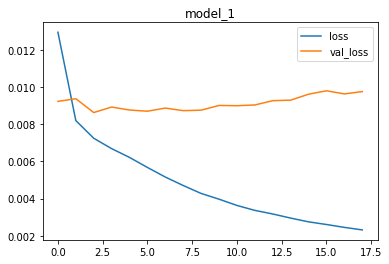

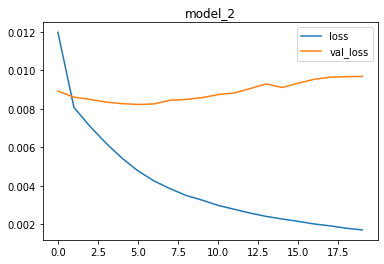

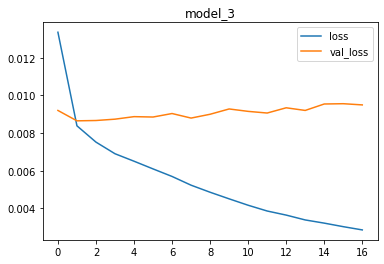

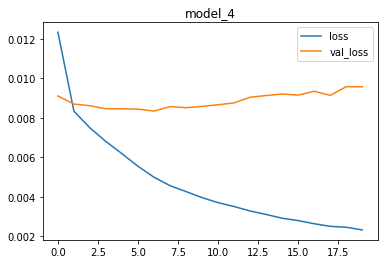

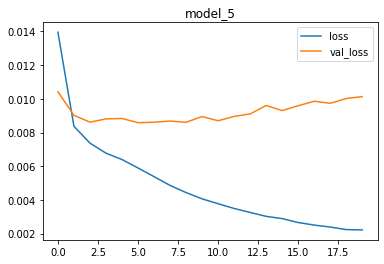

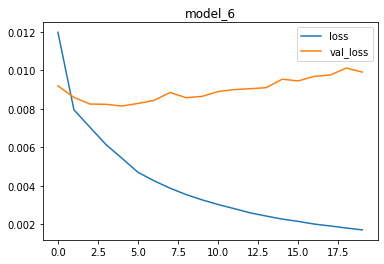

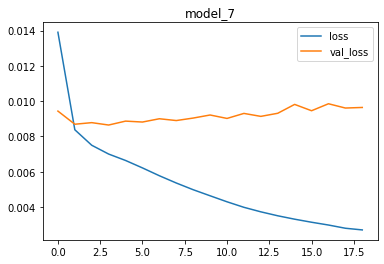

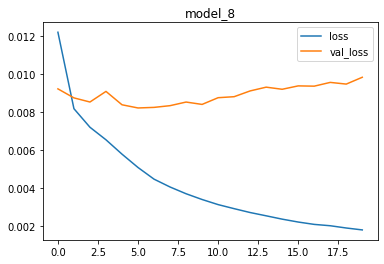

In [81]:
for i,h in enumerate([history1,history2,history3,history4,history5,history6,history7,history8]):
  pd.DataFrame(h.history).plot(title='model_'+str(i+1))